<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/20_sep_2021_fixes/C3/W2/ungraded_labs/C3_W2_Lab_2_sarcasm_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
vocab_size = 1200
embedding_dim = 8
max_length = 20
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 0.8


In [8]:
# sarcasm.json
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 181MB/s]


In [17]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
len(sentences)

26709

In [25]:
training_sentences = sentences[0:int(training_size*len(sentences))]
testing_sentences = sentences[int(training_size*len(sentences)):]
training_labels = labels[0:int(training_size*len(sentences))]
testing_labels = labels[int(training_size*len(sentences)):]
len(training_sentences)

21367

In [26]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [27]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             9600      
                                                                 
 lstm_1 (LSTM)               (None, 64)                18688     
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
668/668 - 8s - loss: 0.4505 - accuracy: 0.7755 - val_loss: 0.3851 - val_accuracy: 0.8225 - 8s/epoch - 13ms/step
Epoch 2/30
668/668 - 3s - loss: 0.3636 - accuracy: 0.8367 - val_loss: 0.3855 - val_accuracy: 0.8278 - 3s/epoch - 5ms/step
Epoch 3/30
668/668 - 4s - loss: 0.3528 - accuracy: 0.8397 - val_loss: 0.3896 - val_accuracy: 0.8280 - 4s/epoch - 5ms/step
Epoch 4/30
668/668 - 4s - loss: 0.3485 - accuracy: 0.8423 - val_loss: 0.3861 - val_accuracy: 0.8252 - 4s/epoch - 6ms/step
Epoch 5/30
668/668 - 4s - loss: 0.3442 - accuracy: 0.8451 - val_loss: 0.3889 - val_accuracy: 0.8195 - 4s/epoch - 5ms/step
Epoch 6/30
668/668 - 3s - loss: 0.3409 - accuracy: 0.8477 - val_loss: 0.3888 - val_accuracy: 0.8278 - 3s/epoch - 5ms/step
Epoch 7/30
668/668 - 3s - loss: 0.3361 - accuracy: 0.8509 - val_loss: 0.4002 - val_accuracy: 0.8197 - 3s/epoch - 5ms/step
Epoch 8/30
668/668 - 3s - loss: 0.3297 - accuracy: 0.8504 - val_loss: 0.3768 - val_accuracy: 0.8295 - 3s/epoch - 5ms/step
Epoch 9/30
668/668 - 3s

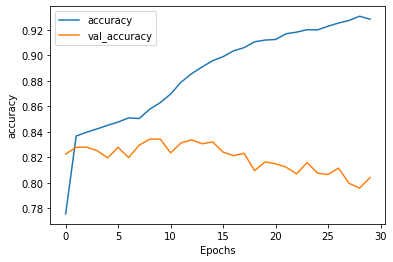

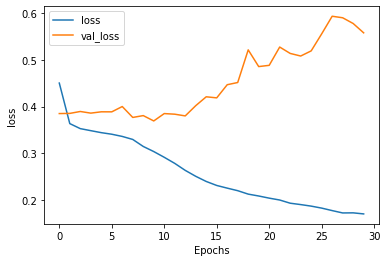

In [32]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")